# Réseaux de Neurones et Classification
David Auger  
*david.auger@uvsq.fr*

<img src="images/david.jpeg" width=200 alt="logo david-lab" align="left"/> <img src="images/uvsq.jpg" width=200 alt="logo uvsq" align="left">

# Plan du cours (en construction)
1. Introduction
  * L'apprentissage automatique : les différents types d'apprentissage
  * Ressources
  * Pré-requis mathématiques  
1. Apprentissage supervisé
  * présentation d'ensemble
  * Modèle général

3. Problèmes de régression
  * Regression linéaire
  * Regression polynomiale
  * Sur et sous-adaptation  
3. Problèmes de classification
  * Le perceptron
  * machines à support de vecteurs 
  * plus proches voisins  
3. *ensuite et peut-être* : en vrac réseaux de neurones, techniques de validation, regularisation

***
# L'Apprentissage Automatique ou *Machine Learning*
## Trois grands types de problèmes
1. Apprentissage supervisé
2. Apprentissage non supervisé
3. Apprentissage par renforcement

## 1) Apprentissage Supervisé : apprendre à faire des *prédictions* sur la base d'exemples

Exemples de tâches d'apprentissage supervisé :
1. Identifier un animal sur une photo
1. Identifier un chiffre manuscrit sur un document
1. Prédire si un email est un spam ou non 


4. Prédire, étant donné l’état du marché aujourd’hui, une valeur boursière pour le lendemain
1. Prédire, étant donné le dossier scolaire d’un étudiant au lycée, quelle note il obtenir au bac en maths ?
1. Prédire, étant données les évaluations passées d’un utilisateur de streaming sur les films qu’il a vu, la note qu'il mettra à un nouveau film qu’on lui propose ?



Les tâches 1,2,3 sont des problèmes de classification (étiquette discrète : oui/non, 0,1,2,...)  
Les tâches 4,5,6 sont des problèmes de régression (étiquette continue : un nombre réel)

Dans le cadre de l'apprentissage supervisé, on a un jeu données $x^i$ et d'étiquettes/cibles $y^i$ correspondantes.

$$x^1 = (x^1_1, x^1_2, \cdots) \longrightarrow y^1$$
$$x^2 = (x^1_1, x^1_2, \cdots) \longrightarrow y^2$$
$$\dots$$

Ce sont les données d'entraînement (*training*) sur lesquels l'algorithme
va apprendre.
On cherche à prédire $y$ pour une nouvelle donnée $x=(x_1,x_2, \cdots)$ de forme similaire à l'*échantillon* d'apprentissage.



*Exemple* 


In [11]:
import sklearn as sk
import numpy as np
from sklearn import datasets

dtset = datasets.load_iris()
print(dtset.keys())
print("\n",dtset['feature_names'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [28]:
print(dtset['data'][:5])

print("\n",dtset['target_names'])
print(dtset['target'][:5])
print(dtset['target'][-5:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

 ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]
[2 2 2 2 2]


In [12]:
indices = np.random.permutation(len(dtset['data']))  #permute  les indices
X = dtset['data'][indices]       # permutation de data  
y = dtset['target'][indices]     # permutation de target
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X[5:], y[5:]) #on retire les 5 premiers pour ensuite pouvoir tester sur les 5 premières données

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
knn.predict(X[:5]), y[:5]

(array([1, 2, 0, 0, 2]), array([1, 2, 0, 0, 1]))

## 2) Apprentissage non supervisé : trouver une structure sur les données
Exemples de tâches d'apprentissage non supervisé :
1. le *clustering*  ou *partionnement* consiste à regrouper les données en sous-ensembles suivant certains critères. Exemples :
  * identifier des communautés sur un réseau social
  * identifier les groupes de clients ayant un comportement similaire (*segmentation de marché*)
  * *compresser* des images en regroupant des pixels similaires
  * identifier les symptômes secondaires d'une maladie


2. La *réduction de dimension* consiste à éliminer dans des données les caractéristiques les moins significatives pour un problème, ou bien d'obtenir plus généralement une représentation de dimension inférieure, afin d'obtenir un problème d'une dimension que l'on sait mieux gérer.

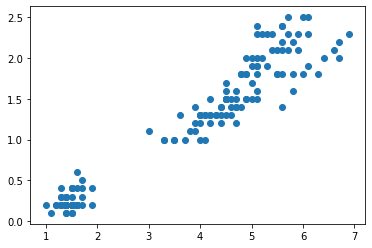

In [16]:
#exemples
import matplotlib.pyplot as plt

x  = dtset['data'][:,[2,3]] # longueur et largeur pétales
y  = dtset['target']  #classe
plt.scatter(x[:,0],x[:,1])

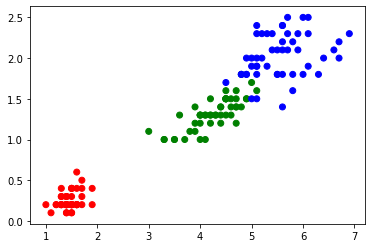

In [17]:
#plot des vraies classes en fonction de longueur/largeur des pétales
couleurs = np.array(['Red','green','blue'])
plt.scatter(x[:,0],x[:,1], c=couleurs[y])

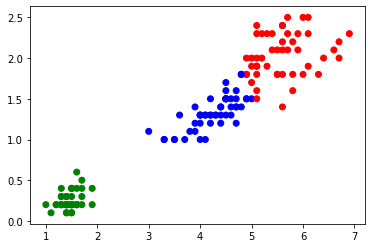

In [18]:
#algorithme de clustering k-means
from sklearn import cluster
modele = sk.cluster.KMeans(n_clusters=3)
modele.fit(x)
plt.scatter(x[:,0],x[:,1], c=couleurs[ modele.labels_ ])

## 3) Apprentissage par renforcement
Exemples de tâches d'apprentissage par renforcement :

1. Apprendre une stratégie optimale dans un jeu (échecs, go, backgammon, tetris, mario...) tout en jouant au jeu.
1. Apprendre à conduire/garder en équilibre/manoeuvrer un robot dans un nouvel environnement



Vois les cours **Théorie algorithmique des jeux et apprentissage par renforcement** (PC) puis **Intelligence Artificielle et Jeux** (DA)

# Outils de programmation utilisés dans le cours

## 1) *python3* dans *jupyter* notebook (feuille de calcul)

<img src="images/python3.jpg" width=200 alt="logo python">

In [19]:
for i in range(100):
    print(i**2,)

0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801


In [20]:
def f(a,b):
    print("hello")
    return a+b

In [21]:
f(3,10)

hello


13

**installation** de python3 et jupyter : de préférence installer la distribution *Anaconda* qui contiendra python3, jupyter et les libraires scientifiques utilisées dans le cours.  
https://www.anaconda.com/products/individual

## 2) numpy : bibliothèque python pour le calcul numérique sur données / vecteurs / matrices  
<img src="images/numpy.png" width=200 alt="logo numpy" text-align="center">
(déjà installé dans Anaconda)   

tuto introductif : https://numpy.org/doc/stable/user/quickstart.html

In [22]:
import numpy as np
tab = np.arange(20)
print(tab)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [23]:
#changement de dimensions
tab = tab.reshape(4,5)
print(tab)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [24]:
#operations et fonctions applicables sur tous les éléments
print(tab**2)
type(tab)

[[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]]


numpy.ndarray

In [7]:
#extrations
tab[:,[0,4]]

array([[ 0,  4],
       [ 5,  9],
       [10, 14],
       [15, 19]])

## 4) matplotlib : bibliothèque python pour les graphiques
<img src="images/plot.svg" width=200 alt="logo matplotlib">
(déjà installé dans Anaconda)   voir exemple plus haut 

https://matplotlib.org/3.3.2/tutorials/index.html

## 3) scikit-learn : bibliothèque python pour l'apprentissage automatique
<img src="images/scikit.png" width=200 alt="logo scikit">
(déjà installé dans Anaconda) voir exemples plus haut  

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

<img src="images/ml_map.png" width=100% alt="carte ML scikit-learn">

## 4) pandas : bibliothèque python pour manipuler les données
<img src="images/pandas.png" width=200 alt="logo pandas">
plus adapté que *numpy* pour la manipulation des données réelles
(déjà installé dans Anaconda)   

https://pandas.pydata.org/docs/getting_started/intro_tutorials/  
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [26]:
import pandas as pd
data = pd.read_csv("datasets/iris.csv")
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 5) seaborn : bibliothèque python pour manipuler et visualiser les données
<img src="images/seaborn.svg" width=200 alt="logo seaborn">
(déjà installé dans Anaconda)   

https://seaborn.pydata.org/tutorial.html

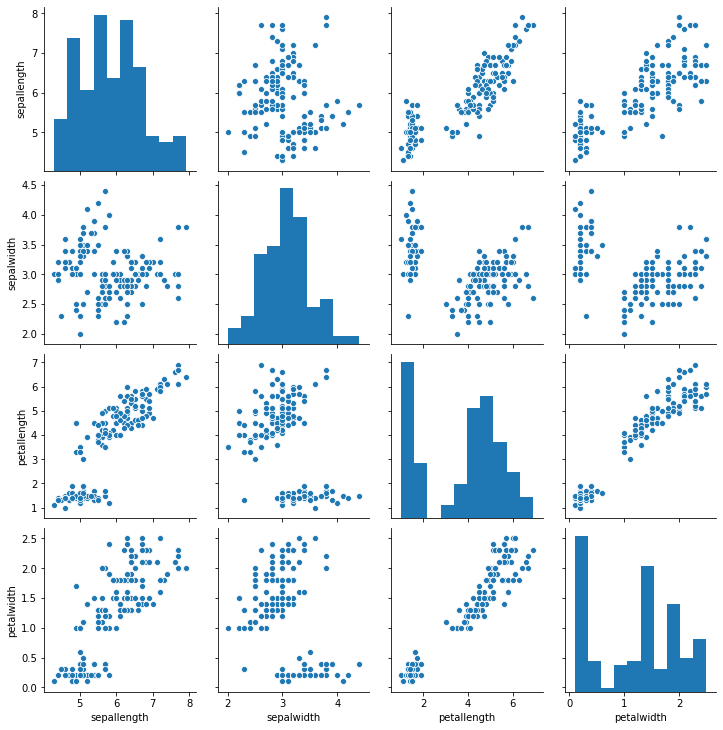

In [27]:
import seaborn as sns
sns.pairplot(data)

## 6) pytorch : bibliothèque python pour les réseaux de neurones
<img src="images/pytorch.png" width=200 alt="logo pytorch">
installation : voir plus tard

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

# Ressources de données pour l'apprentissage supervisé
*  **scikit-learn** contient déjà des jeux de données
* **Kaggle** https://www.kaggle.com/
* **Université de Californie** http://www.ics.uci.edu/~mlearn/MLRepository.html

# Ressources sur l'apprentissage automatique
(pas les ressources officielles du cours, je pioche dans divers endroits, mais bonnes références)

1. Livres
  * *machine-learning-avec-scikit-learn*, Aurélien Géron  
  (très axé sur la pratique et le code)  
  https://www.dunod.com/sciences-techniques/machine-learning-avec-scikit-learn-mise-en-oeuvre-et-cas-concrets-0
  *  *An Introduction to Statistical Learning with Applications in R*,  Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani  
  (axé statistique avec beaucoup d'exemples)  
  http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf


  * *Learning from data: a short course*, Yaser S. Abu-Mostafa, Malik Magdon-Ismail, Hsuan-Tien Lin  
  (très bien pour prendre du recul)  
  http://amlbook.com/
  * *Understanding Machine Learning: From Theory to Algorithms*, Shai Shalev-Shwartz, Shai Ben-David  
  (développe les questions autour de 'qu'est-ce qu'apprendre')  
  https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf
  *  *L'apprentissage profond*, Ian Goodfellow, Yoshua Bengio, Aaron Courville, Francis Bach  
  (un peu difficile à lire mais une référence)  
  https://www.apprentissageprofond.org/
  

2. Cours sur YouTube
    * Cours de Caltech, Yaser Abu-Mostafa  
    https://www.youtube.com/playlist?list=PLD63A284B7615313A
    * Cours de Stanford, Andrew Ng  
    https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU
    * Cours de Waterloo (Canada), Shai Ben-David  
    https://www.youtube.com/playlist?list=PLFze15KrfxbH8SE4FgOHpMSY1h5HiRLMm
    
    